In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB17_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB17.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

,time,ammonia nitrogen
0,0.000000,0.044343
1,0.002903,0.006116
2,0.005805,0.235474
3,0.008708,0.082569
4,0.011611,0.159021
...,...,...
292,0.986938,0.006116
293,0.989840,0.006116
294,0.993470,0.006116
295,0.996371,0.006116


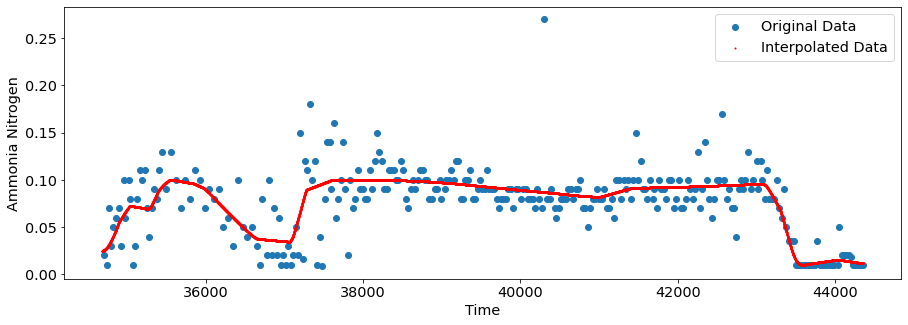

313/313 [==============================] - 0s 345us/step - loss: 2.1864e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0084
AN_max = 0.27
time_min = 34709.00     
time_max = 44355.41     

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078682123
,0.084798389
,0.091121985
,0.097445581
,0.103769177
,0.110092773
,0.116520035
,0.1226363
,0.128959897
,0.135283493
,0.141607089
,0.147930685
,0.154357947
,0.160474212
,0.166797808
,0.173121405
,0.179445001
,0.185768597
,0.192195859
,0.198415789
,0.211062982
])
interpolation

array([[0.33289614],
       [0.34765878],
       [0.35014573],
       [0.34673348],
       [0.34332117],
       [0.33990893],
       [0.33644068],
       [0.32877657],
       [0.32032388],
       [0.30516317],
       [0.28609267],
       [0.26587677],
       [0.24532942],
       [0.22585629],
       [0.20664497],
       [0.18773955],
       [0.16883409],
       [0.15008804],
       [0.13166513],
       [0.1173093 ],
       [0.10921159]], dtype=float32)